# Assignment: Exploratory Data Analysis


**Q1.** To compute the sample mean of a variable $X$:
$$
m(X) = \dfrac{1}{N} \sum_{i=1}^N x_i
$$
and sample covariance of two variables $X$ and $Y$,
$$
\text{cov}(X,Y) = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))(y_i - m(Y))).
$$
Recall, the sample variance of $X$ is
$$
s^2 = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))^2.
$$
It can be very helpful to understand some basic properties of these statistics. If you want to write your calculations on a piece of paper, take a photo, and upload that to your GitHub repo, that's probably easiest.

1. Show that $m(a + bX) = a+b \times m(X)$.
2. Show that $\text{cov}(X,a+bY) = b \times \text{cov}(X,Y)$
3. Show that $\text{cov}(a+bX,a+bX) = b^2 \text{cov}(X,X) $, and in particular that $\text{cov}(X,X) = s^2 $.
4. Instead of the mean, consider the median. Consider transformations that are non-decreasing (if $x\ge x'$, then $g(x)\ge g(x')$), like $2+5 \times X$ or $\text{arcsinh}(X)$. Is a non-decreasing transformation of the median the median of the transformed variable? Explain. Does your answer apply to any quantile? The IQR? The range?
5. Consider a non-decreasing transformation $g()$. Is is always true that $m(g(X))= g(m(X))$?

**Q2.** This question looks at financial transfers from foreign entities to American universities. In particular, from which countries and giftors are the gifts coming from, and to which institutions are they going? For this question, `.groupby([vars]).count()` and `.groupby([vars]).sum()` will be especially useful to tally the number of occurrences and sum the values of those occurrences.

1. Load the `./data/ForeignGifts_edu.csv` dataset.
2. For `Foreign Gift Amount`, create a histogram and describe the variable. Describe your findings.
3. For `Gift Type`, create a histogram or value counts table. What proportion of the gifts are contracts, real estate, and monetary gifts?
4. Create a kernel density plot of the log of `Foreign Gift Amount`, and then a kernel density plot of the log of `Foreign Gift Amount` conditional on gift type. Do you notice any patterns?
5. What are the top 15 countries in terms of the number of gifts? What are the top 15 countries in terms of the amount given?
6. What are the top 15 institutions in terms of the total amount of money they receive? Make a histogram of the total amount received by all institutions.
7. Which giftors provide the most money, in total?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import files
uploaded = files.upload()

Saving ForeignGifts_edu.csv to ForeignGifts_edu.csv


In [3]:
file_path = r"ForeignGifts_edu.csv"
df = pd.read_csv(file_path)

count    2.822100e+04
mean     5.882327e+05
std      3.222011e+06
min     -5.377700e+05
25%      5.700000e+03
50%      9.461500e+04
75%      3.761420e+05
max      1.000000e+08
Name: Foreign Gift Amount, dtype: float64


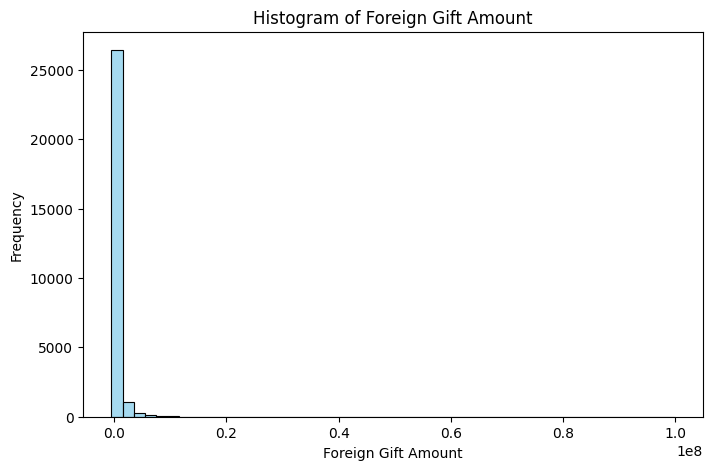

The mean gift was about 588,000, the min was somehow negative, and the max was 100 million. most gifts are within the first of 50 bins,
 meaning in the 0-200k range.


In [11]:
print(df['Foreign Gift Amount'].describe())
plt.figure(figsize=(8,5))
sns.histplot(df['Foreign Gift Amount'], bins=50, color='skyblue')
plt.title('Histogram of Foreign Gift Amount')
plt.xlabel('Foreign Gift Amount')
plt.ylabel('Frequency')
plt.show()

print("The mean gift was about 588,000, the min was somehow negative, and the max was 100 million. most gifts are within the first of 50 bins,\n meaning in the 0-200k range.")

Gift Type
Contract         17274
Monetary Gift    10936
Real Estate         11
Name: count, dtype: int64


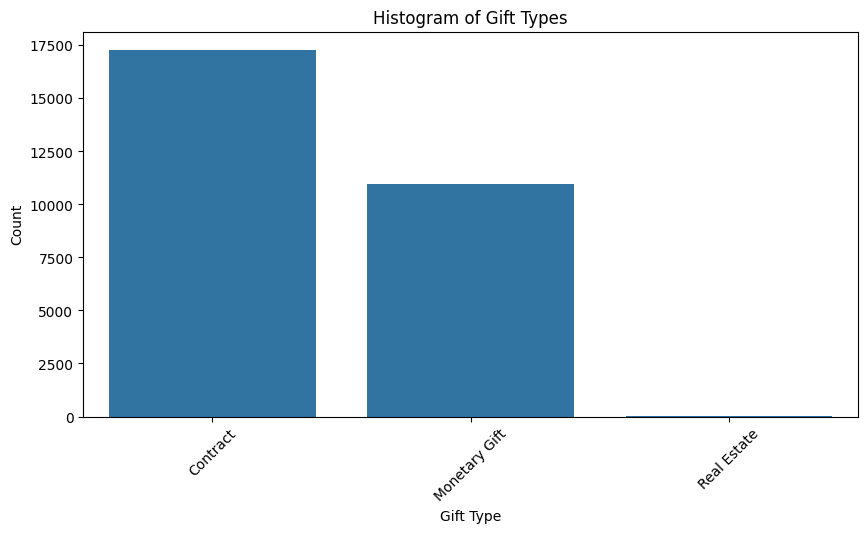

Proportion of Contracts: 61.21%
Proportion of Real Estate: 0.04%
Proportion of Monetary gifts: 38.75%


In [16]:
print(df['Gift Type'].value_counts())
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='Gift Type', order=df['Gift Type'].value_counts().index)
plt.title('Histogram of Gift Types')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.ylabel('Count')
plt.show()

total_gifts = len(df)
gift_counts = df['Gift Type'].value_counts()
contracts_prop = gift_counts.get('Contract', 0) / total_gifts
real_estate_prop = gift_counts.get('Real Estate', 0) / total_gifts
monetary_prop = gift_counts.get('Monetary Gift', 0) / total_gifts
print(f"Proportion of Contracts: {contracts_prop:.2%}")
print(f"Proportion of Real Estate: {real_estate_prop:.2%}")
print(f"Proportion of Monetary gifts: {monetary_prop:.2%}")

/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


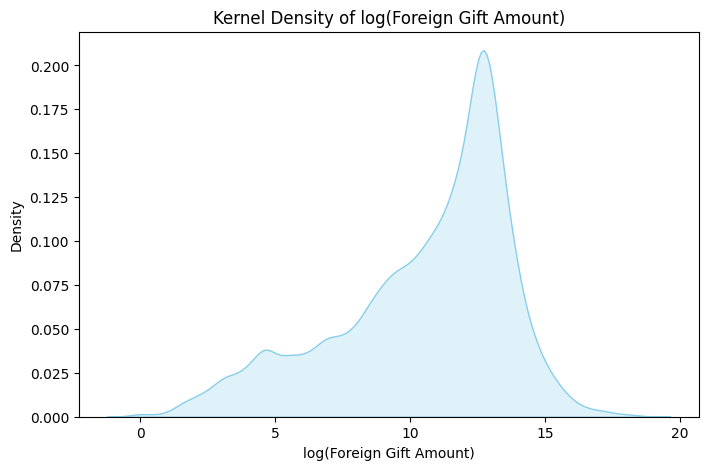

/tmp/ipython-input-799922810.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Gift Type', bbox_to_anchor=(1.05, 1), loc='upper left')


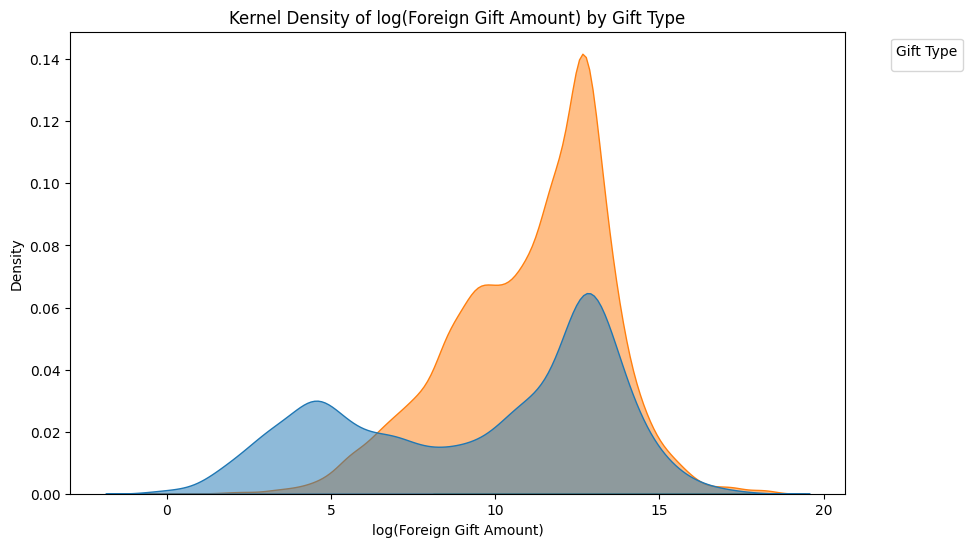

Most gifts overall peak around e^13 or so, and both types of gifts (monetary and contract) both have their peaks there.
 In the lower regions, however, it seems that monetary gets more of the lower value donations


In [22]:
df['log_ForeignGift'] = np.log(df['Foreign Gift Amount'])

plt.figure(figsize=(8,5))
sns.kdeplot(df['log_ForeignGift'], fill=True, color='skyblue')
plt.title('Kernel Density of log(Foreign Gift Amount)')
plt.xlabel('log(Foreign Gift Amount)')
plt.ylabel('Density')
plt.show()

plt.figure(figsize=(10,6))
sns.kdeplot(data=df, x='log_ForeignGift', hue='Gift Type', fill=True, alpha=0.5)
plt.title('Kernel Density of log(Foreign Gift Amount) by Gift Type')
plt.xlabel('log(Foreign Gift Amount)')
plt.ylabel('Density')
plt.legend(title='Gift Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

print("Most gifts overall peak around e^13 or so, and both types of gifts (monetary and contract) both have their peaks there.\n In the lower regions, however, it seems that monetary gets more of the lower value donations")

In [27]:
gift_counts = df['Country of Giftor'].value_counts()
print(gift_counts.head(15))

amount_sums = df.groupby('Country of Giftor')['Foreign Gift Amount'].sum()
print(amount_sums.sort_values(ascending=False).head(15))

Country of Giftor
ENGLAND            3655
CHINA              2461
CANADA             2344
JAPAN              1896
SWITZERLAND        1676
SAUDI ARABIA       1610
FRANCE             1437
GERMANY            1394
HONG KONG          1080
SOUTH KOREA         811
QATAR               693
THE NETHERLANDS     512
KOREA               452
INDIA               434
TAIWAN              381
Name: count, dtype: int64
Country of Giftor
QATAR                   2706240869
ENGLAND                 1464906771
CHINA                   1237952112
SAUDI ARABIA            1065205930
BERMUDA                  899593972
CANADA                   898160656
HONG KONG                887402529
JAPAN                    655954776
SWITZERLAND              619899445
INDIA                    539556490
GERMANY                  442475605
UNITED ARAB EMIRATES     431396357
FRANCE                   405839396
SINGAPORE                401157692
AUSTRALIA                248409202
Name: Foreign Gift Amount, dtype: int64


Institution Name
Carnegie Mellon University                       1477922504
Cornell University                               1289937761
Harvard University                                954803610
Massachusetts Institute of Technology             859071692
Yale University                                   613441311
Texas A&M University                              521455050
Johns Hopkins University                          502409595
Northwestern University                           402316221
Georgetown University                             379950511
University of Chicago (The)                       364544338
University of Colorado Boulder                    360173159
Duke University                                   343699498
Brigham Young University                          323509863
Stanford University                               319561362
University of Texas MD Anderson Cancer Center     301527419
Name: Foreign Gift Amount, dtype: int64


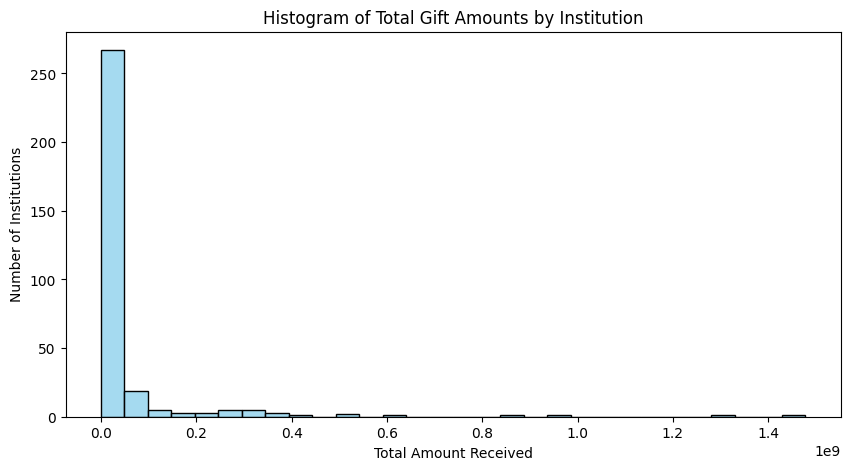

In [32]:
institution_totals = df.groupby('Institution Name')['Foreign Gift Amount'].sum()
print(institution_totals.sort_values(ascending=False).head(15))

plt.figure(figsize=(10,5))
sns.histplot(institution_totals, bins=30, color='skyblue')
plt.title('Histogram of Total Gift Amounts by Institution')
plt.xlabel('Total Amount Received')
plt.ylabel('Number of Institutions')
plt.show()

In [35]:
giftor_totals = df.groupby('Giftor Name')['Foreign Gift Amount'].sum()
giftor_totals.sort_values(ascending=False).head(15)

,Foreign Gift Amount
Giftor Name,
Qatar Foundation,1166503744
Qatar Foundation/Qatar National Res,796197000
Qatar Foundation for Education,373945215
Anonymous,338793629
Saudi Arabian Cultural Mission,275221475
HCL,190000000
Church of Jesus Christ of LDS,185203715
Emirates Institute for Advanced Sc,170641244
QIC,148355497


**Q3.** This question uses the Airbnb data to practice making visualizations.

  1. Load the `./data/airbnb_hw.csv` data with Pandas. This provides a dataset of AirBnB rental properties for New York City.  
  2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
  3. Cross tabulate `Room Type` and `Property Type`. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?
  4. For `Price`, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use `log` to transform price into a new variable, `price_log`, and take these steps again.
  5. Make a scatterplot of `price_log` and `Beds`. Describe what you see. Use `.groupby()` to compute a desciption of `Price` conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.
  6. Make a scatterplot of `price_log` and `Beds`, but color the graph by `Room Type` and `Property Type`. What patterns do you see? Compute a description of `Price` conditional on `Room Type` and `Property Type`. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?
  7. We've looked a bit at this `price_log` and `Beds` scatterplot. Use seaborn to make a `jointplot` with `kind=hex`. Where are the data actually distributed? How does it affect the way you think about the plots in 5 and 6?

In [36]:
from google.colab import files
uploaded = files.upload()

Saving airbnb_hw.csv to airbnb_hw.csv


In [38]:
file_path = r"airbnb_hw.csv"
df2 = pd.read_csv(file_path)

In [44]:
print(df2.shape)
print("30478 rows/observations, 13 columns")
df2.head()

(30478, 13)
30478 rows/observations, 13 columns


,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0


In [46]:
room_property_ct = pd.crosstab(df2['Room Type'], df2['Property Type'])
print(room_property_ct)
print("lots of apartments, mostly entore or one room. Houses tend to have the largest proportion of single rooms.\n bead and breakfast also has more common provate than entire place. Treehouse (lol) and dorm have the most shared rooms as % of total")

Property Type    Apartment  Bed & Breakfast  Boat  Bungalow  Cabin  Camper/RV  \
Room Type                                                                       
Entire home/apt      15669               13     7         4      1          6   
Private room         10748              155     1         0      1          1   
Shared room            685               12     0         0      0          0   

Property Type    Castle  Chalet  Condominium  Dorm  House  Hut  Lighthouse  \
Room Type                                                                    
Entire home/apt       0       0           72     4    752    0           1   
Private room          1       1           22    16   1258    2           0   
Shared room           0       0            0    11     80    0           0   

Property Type    Loft  Other  Tent  Townhouse  Treehouse  Villa  
Room Type                                                        
Entire home/apt   392     14     0         83          0      4  
Priva

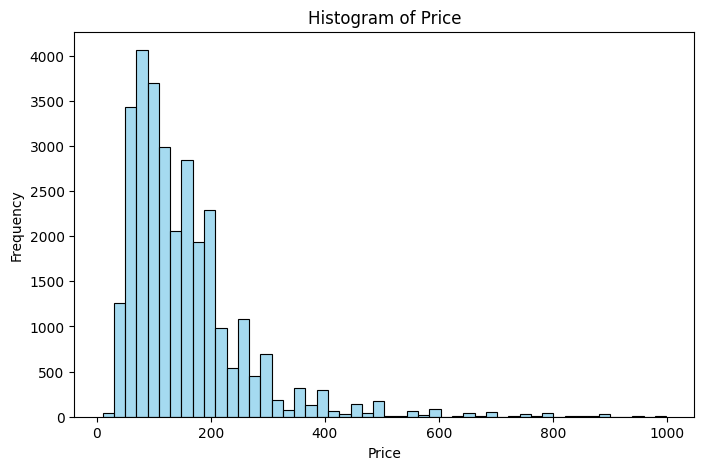

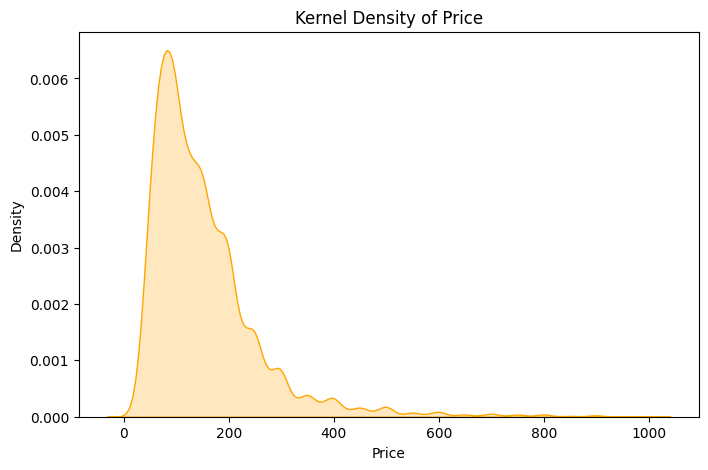

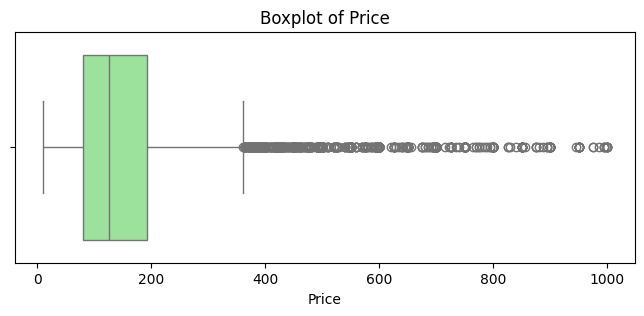

count    30297.000000
mean       153.357032
std        108.895698
min         10.000000
25%         80.000000
50%        125.000000
75%        192.000000
max        999.000000
Name: Price, dtype: float64
there are a whole lot of outliers based on the boxplot, which is probably because the mean is so low (153)


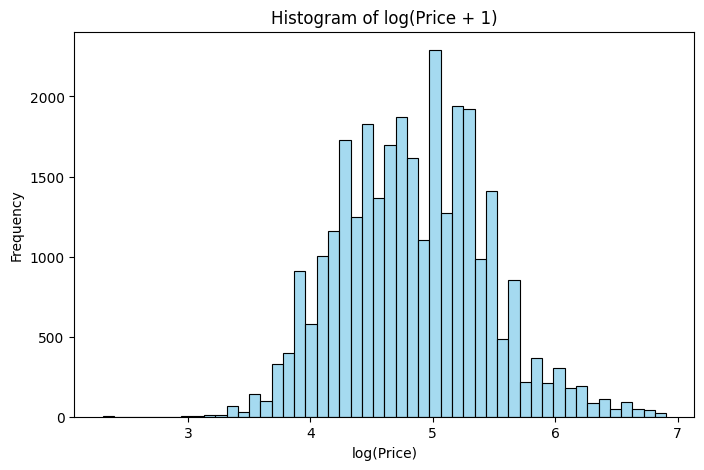

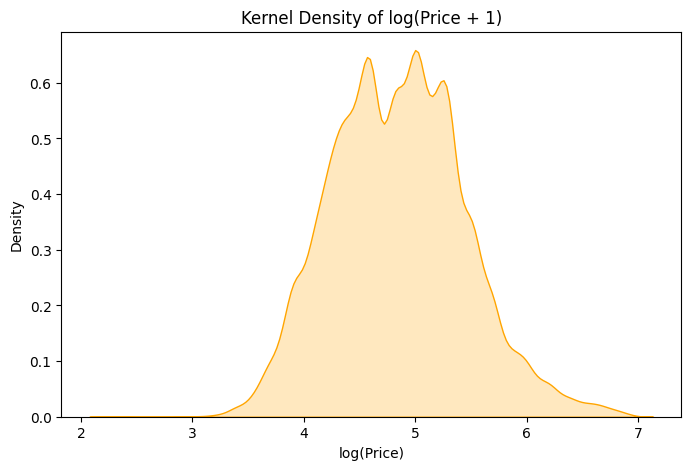

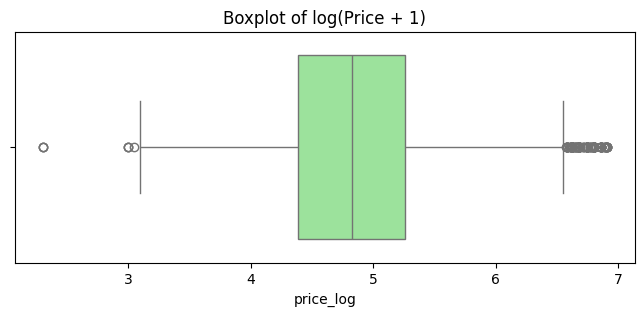

count    30297.000000
mean         4.845370
std          0.596999
min          2.302585
25%          4.382027
50%          4.828314
75%          5.257495
max          6.906755
Name: price_log, dtype: float64
log makes it much more normally distributed, but we still have a considerable amount of outliers based on the boxplot


In [54]:
df2['Price'] = pd.to_numeric(df2['Price'], errors='coerce')


plt.figure(figsize=(8,5))
sns.histplot(df2['Price'], bins=50, color='skyblue')
plt.title('Histogram of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(8,5))
sns.kdeplot(df2['Price'], fill=True, color='orange')
plt.title('Kernel Density of Price')
plt.xlabel('Price')
plt.ylabel('Density')
plt.show()

plt.figure(figsize=(8,3))
sns.boxplot(x=df2['Price'], color='lightgreen')
plt.title('Boxplot of Price')
plt.show()

print(df2['Price'].describe())

print("there are a whole lot of outliers based on the boxplot, which is probably because the mean is so low (153)")

df2['price_log'] = np.log(df2['Price'])

plt.figure(figsize=(8,5))
sns.histplot(df2['price_log'], bins=50, color='skyblue')
plt.title('Histogram of log(Price + 1)')
plt.xlabel('log(Price)')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(8,5))
sns.kdeplot(df2['price_log'], fill=True, color='orange')
plt.title('Kernel Density of log(Price + 1)')
plt.xlabel('log(Price)')
plt.ylabel('Density')
plt.show()

plt.figure(figsize=(8,3))
sns.boxplot(x=df2['price_log'], color='lightgreen')
plt.title('Boxplot of log(Price + 1)')
plt.show()

print(df2['price_log'].describe())

print("log makes it much more normally distributed, but we still have a considerable amount of outliers based on the boxplot")

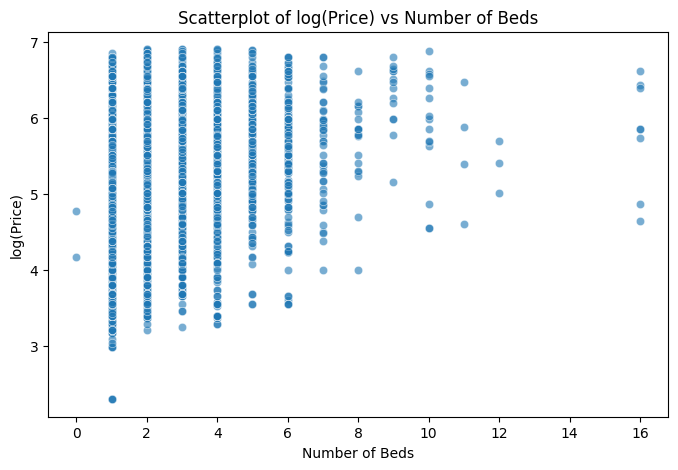

more beds tends to correlate to a higher price
    Beds  count        mean         std    min    max
0    0.0      2   92.000000   38.183766   65.0  119.0
1    1.0  20307  124.757670   75.685752   10.0  950.0
2    2.0   6561  186.702332  115.044205   25.0  999.0
3    3.0   2029  234.928043  142.288189   26.0  999.0
4    4.0    766  280.554830  175.512312   27.0  999.0
5    5.0    274  322.000000  190.319415   35.0  995.0
6    6.0    166  316.313253  201.157585   35.0  900.0
7    7.0     45  341.377778  220.116631   55.0  900.0
8    8.0     20  331.850000  155.652202   55.0  750.0
9    9.0     14  587.142857  208.351721  175.0  900.0
10  10.0     15  442.200000  263.926992   95.0  975.0
11  11.0      4  332.250000  236.798613  100.0  650.0
12  12.0      3  225.000000   75.000000  150.0  300.0
13  16.0      8  402.250000  235.093143  104.0  750.0
average price tends to increase as beds increases like we saw in the scatterplot, but so does std dev


In [58]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df2, x='Beds', y='price_log', alpha=0.6)
plt.title('Scatterplot of log(Price) vs Number of Beds')
plt.xlabel('Number of Beds')
plt.ylabel('log(Price)')
plt.show()

print("more beds tends to correlate to a higher price")

beds_summary = df2.groupby('Beds')['Price'].agg(['count', 'mean', 'std', 'min', 'max']).reset_index()

print(beds_summary)

print("average price tends to increase as beds increases like we saw in the scatterplot, but so does std dev")

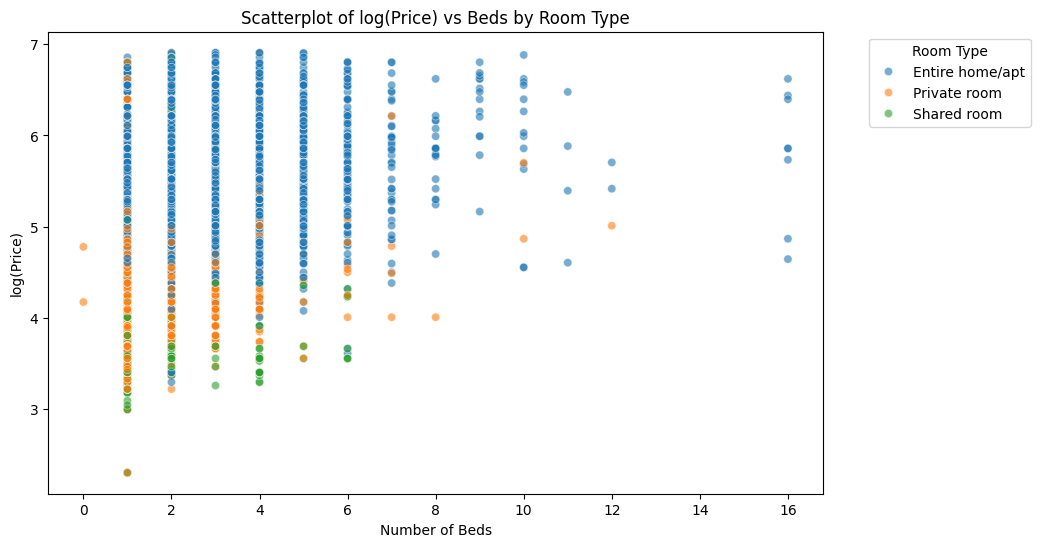

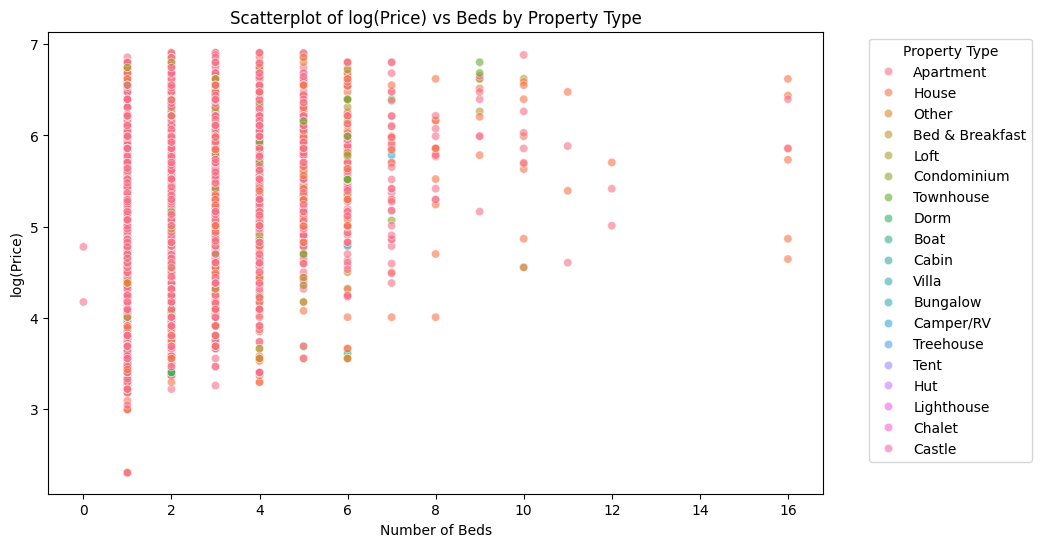

entire homes are more expensive, and the majority of low bed setups are apartment. Also, somehow a private room can have 12 beds.
          Room Type    Property Type  count        mean         std    min  \
11  Entire home/apt            Other     10  290.800000  273.526273   66.0   
10  Entire home/apt             Loft    379  284.910290  184.515517   55.0   
6   Entire home/apt      Condominium     71  281.126761  175.313998   80.0   
4   Entire home/apt            Cabin      1  250.000000         NaN  250.0   
12  Entire home/apt        Townhouse     81  242.037037  166.755243   66.0   
8   Entire home/apt            House    723  234.554633  159.785974   27.0   
13  Entire home/apt            Villa      3  206.333333   89.667906  120.0   
0   Entire home/apt        Apartment  15550  200.210161  109.967435   10.0   
1   Entire home/apt  Bed & Breakfast     13  184.538462  119.814172   85.0   
26     Private room            Other     28  176.642857  141.484252   39.0   
38      Shar

In [61]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df2, x='Beds', y='price_log', hue='Room Type', alpha=0.6)
plt.title('Scatterplot of log(Price) vs Beds by Room Type')
plt.xlabel('Number of Beds')
plt.ylabel('log(Price)')
plt.legend(title='Room Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

plt.figure(figsize=(10,6))
sns.scatterplot(data=df2, x='Beds', y='price_log', hue='Property Type', alpha=0.6)
plt.title('Scatterplot of log(Price) vs Beds by Property Type')
plt.xlabel('Number of Beds')
plt.ylabel('log(Price)')
plt.legend(title='Property Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

print("entire homes are more expensive, and the majority of low bed setups are apartment. Also, somehow a private room can have 12 beds.")

room_property_stats = df2.groupby(['Room Type','Property Type'])['Price'].agg(['count','mean','std','min','median','max']).reset_index()

print(room_property_stats.sort_values('mean', ascending=False))

print("Entire homes with property type other are the most expensive on average, while shared room bed and breakfast have the highest std dev. \nMedian is probably a better estimate of central tendency because there are a lot of entire home outliers with high beds/prices")

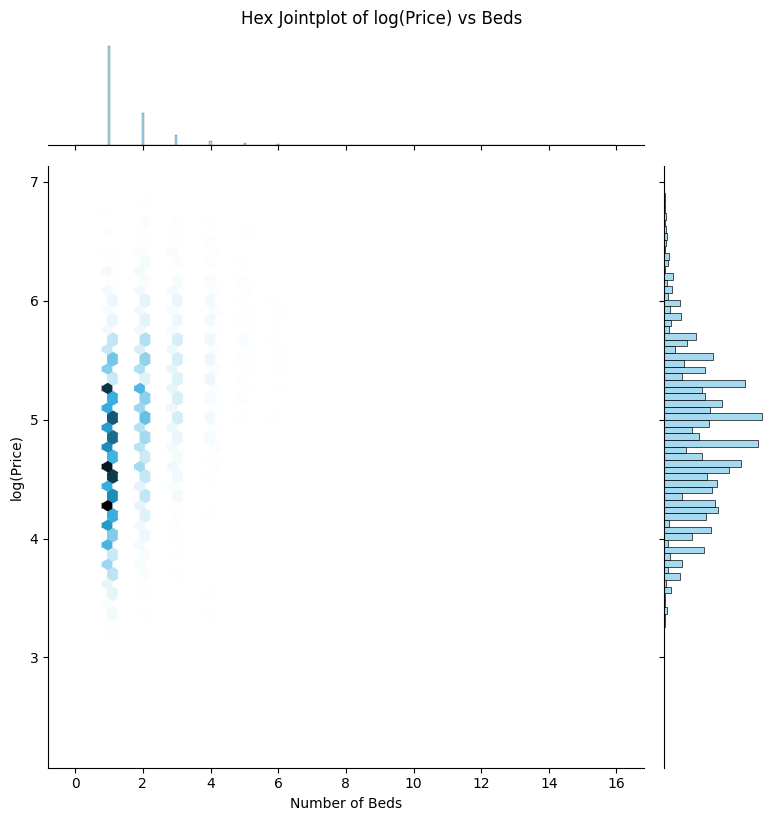

the data is concentrated in the 2-4 bed range, and mid-level logged prices. 
This makes me think that there are definitely some outliers biasing some of these prior EDAs upward


In [63]:
sns.jointplot(
    data=df2,
    x='Beds',
    y='price_log',
    kind='hex',
    height=8,
    color='skyblue'
)

plt.suptitle('Hex Jointplot of log(Price) vs Beds', y=1.02)
plt.xlabel('Number of Beds')
plt.ylabel('log(Price)')
plt.show()

print("the data is concentrated in the 2-4 bed range, and mid-level logged prices. \nThis makes me think that there are definitely some outliers biasing some of these prior EDAs upward")

**Q4.** This question looks at a time series of the number of active oil drilling rigs in the United States over time. The data comes from the Energy Information Agency.

1. Load `./data/drilling_rigs.csv` and examine the data. How many observations? How many variables? Are numeric variables correctly read in by Pandas, or will some variables have to be typecast/coerced? Explain clearly how these data need to be cleaned.
2. To convert the `Month` variable to an ordered datetime variable, use `df['time'] = pd.to_datetime(df['Month'], format='mixed')`.
3. Let's look at `Active Well Service Rig Count (Number of Rigs)`, which is the total number of rigs over time. Make a line plot of this time series. Describe what you see.
4. Instead of levels, we want to look at change over time. Compute the first difference of  `Active Well Service Rig Count (Number of Rigs)` and plot it over time. Describe what you see.
5. The first two columns are the number of onshore and offshore rigs, respectively. Melt these columns and plot the resulting series.

In [64]:
from google.colab import files
uploaded = files.upload()

Saving drilling_rigs.csv to drilling_rigs.csv


In [66]:
file_path = r"drilling_rigs.csv"
df3 = pd.read_csv(file_path)

In [77]:
print("Shape of df3:", df3.shape)
print("Number of observations:", len(df3))
print("Number of variables:", df3.shape[1])
print(df3.dtypes)
print(df3.info())

print("we must typecast all the non-int objects besides months to floats using pd_to_numeric. We also should convert the month to time.")

df3['Crude Oil Rotary Rigs in Operation, Total (Number of Rigs)'] = pd.to_numeric(df3['Crude Oil Rotary Rigs in Operation, Total (Number of Rigs)'], errors='coerce')
df3['Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)'] = pd.to_numeric(df3['Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)'], errors='coerce')
df3['Crude Oil and Natural Gas Rotary Rigs in Operation, Horizontal Trajectory (Number of Rigs)'] = pd.to_numeric(df3['Crude Oil and Natural Gas Rotary Rigs in Operation, Horizontal Trajectory (Number of Rigs)'], errors='coerce')
df3['Crude Oil and Natural Gas Rotary Rigs in Operation, Directional Trajectory (Number of Rigs)'] = pd.to_numeric(df3['Crude Oil and Natural Gas Rotary Rigs in Operation, Directional Trajectory (Number of Rigs)'], errors='coerce')
df3['Crude Oil and Natural Gas Rotary Rigs in Operation, Vertical Trajectory (Number of Rigs)'] = pd.to_numeric(df3['Crude Oil and Natural Gas Rotary Rigs in Operation, Vertical Trajectory (Number of Rigs)'], errors='coerce')
df3['Active Well Service Rig Count (Number of Rigs)'] = pd.to_numeric(df3['Active Well Service Rig Count (Number of Rigs)'], errors='coerce')
df3['time'] = pd.to_datetime(df3['Month'], format='mixed')


Shape of df3: (623, 11)
Number of observations: 623
Number of variables: 11
Month                                                                                                  object
Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)                            int64
Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)                           int64
Crude Oil Rotary Rigs in Operation, Total (Number of Rigs)                                            float64
Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)                                          float64
Crude Oil and Natural Gas Rotary Rigs in Operation, Horizontal Trajectory (Number of Rigs)            float64
Crude Oil and Natural Gas Rotary Rigs in Operation, Directional Trajectory (Number of Rigs)           float64
Crude Oil and Natural Gas Rotary Rigs in Operation, Vertical Trajectory (Number of Rigs)              float64
Crude Oil and Natural Gas Rotary Rigs in Ope

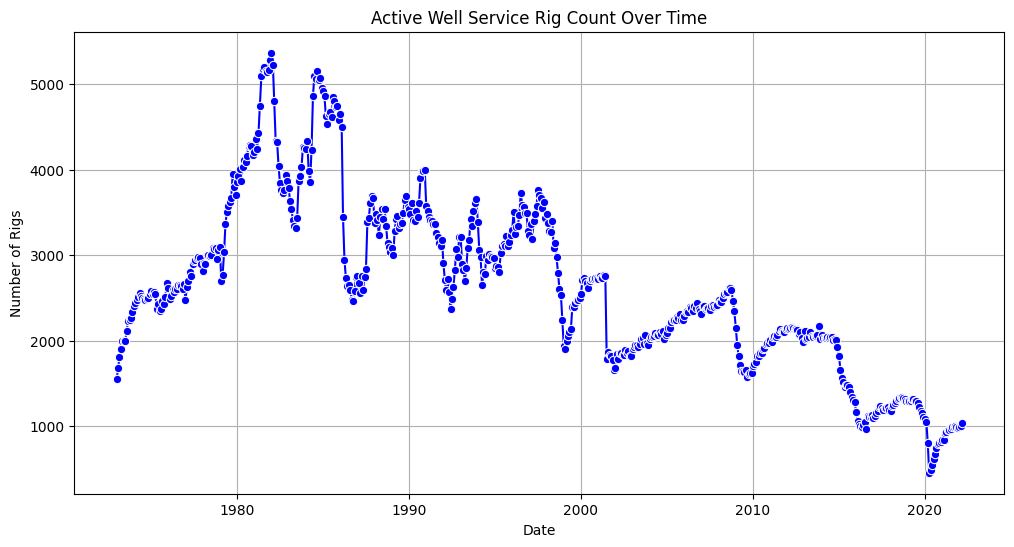

rigs are increasing into the 80s but then start to steadily decrease over time atarting around 1987. 
There are also a number of large drops, like around 1987 or 2002.


In [82]:
plt.figure(figsize=(12,6))
sns.lineplot(data=df3, x='time', y='Active Well Service Rig Count (Number of Rigs)', marker='o', color='blue')
plt.title('Active Well Service Rig Count Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Rigs')
plt.grid(True)
plt.show()

print("rigs are increasing into the 80s but then start to steadily decrease over time atarting around 1987. \nThere are also a number of large drops, like around 1987 or 2002.")

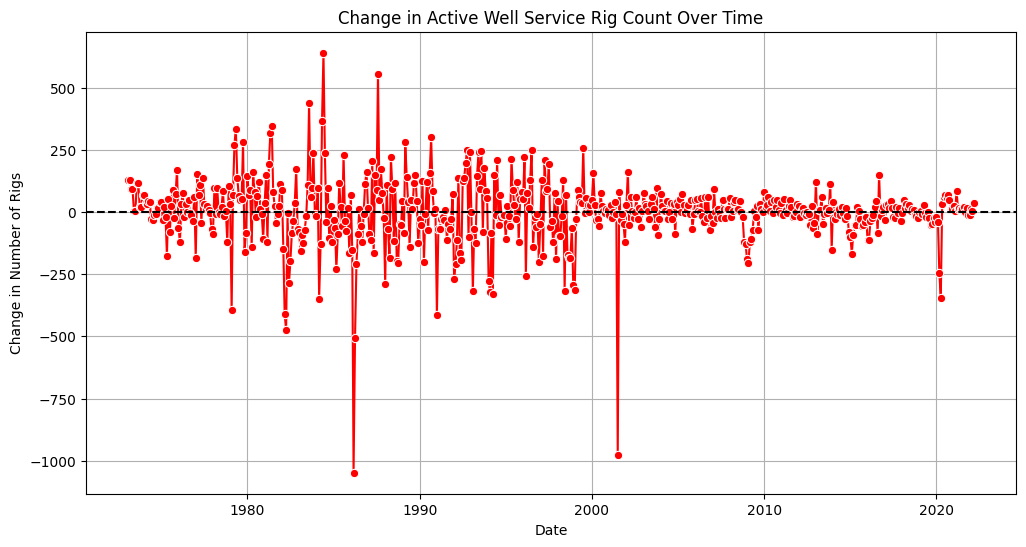

like I noted earlier, there are 2 large drops around 86/87 and 01/02. 
Besides that it's kind of difficicult to draw much from this graph because it's so cluttered


In [85]:
df3['Rig_Count_Change'] = df3['Active Well Service Rig Count (Number of Rigs)'].diff()
plt.figure(figsize=(12,6))
sns.lineplot(data=df3, x='time', y='Rig_Count_Change', marker='o', color='red')
plt.title('Change in Active Well Service Rig Count Over Time')
plt.xlabel('Date')
plt.ylabel('Change in Number of Rigs')
plt.axhline(0, color='black', linestyle='--')  # baseline for no change
plt.grid(True)
plt.show()

print("like I noted earlier, there are 2 large drops around 86/87 and 01/02. \nBesides that it's kind of difficicult to draw much from this graph because it's so cluttered")

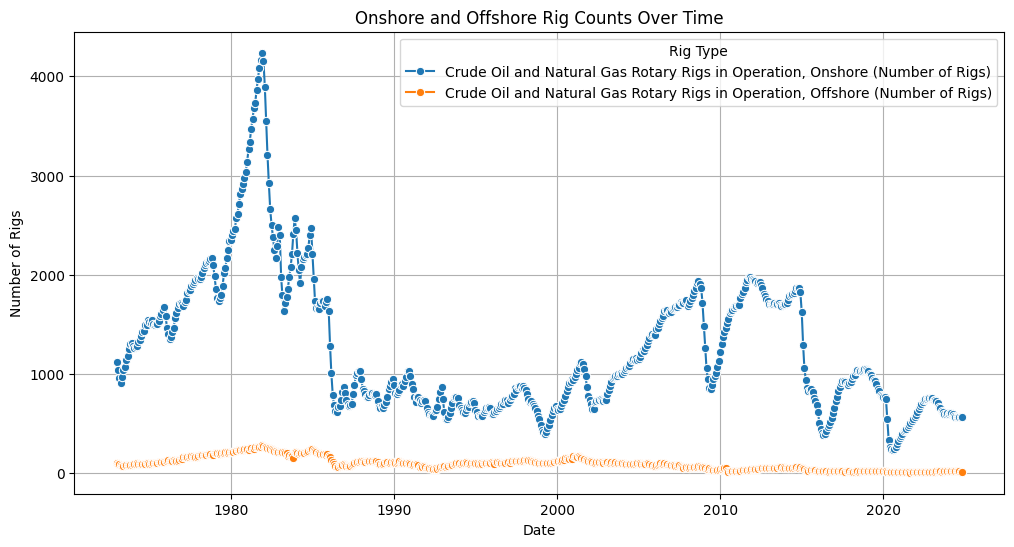

In [94]:
df_melted = df3.melt(
    id_vars='time',
    value_vars=['Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)', 'Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)'],
    var_name='Rig_Type',
    value_name='Rig_Count'
)

plt.figure(figsize=(12,6))
sns.lineplot(data=df_melted, x='time', y='Rig_Count', hue='Rig_Type', marker='o')
plt.title('Onshore and Offshore Rig Counts Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Rigs')
plt.grid(True)
plt.legend(title='Rig Type')
plt.show()